<a href="https://colab.research.google.com/github/putrik06/Question_Answering_NLP/blob/main/Top_4_Sentence_Embedding_Techniques_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1:
Firstly, import the libraries and download ‘punkt‘

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Step 2:
Then, we define our list of sentences. You can use a larger list (it is best to use a list of sentences for easier processing of each sentence)


In [ ]:
sentences = ["I ate dinner",
            "We had a three-course meal",
            "Brad came to dinner with us",
            "He loves fish tacos",
            "In the end, we all felt like we ate too much",
            "We all agreed; it was a magnificent evening"]


Step 3:
We will also keep a tokenized version of these sentences.

In [ ]:
tokenized_sent = []

for s in sentences:
  tokenized_sent.append(word_tokenize(s.lower()))

print(tokenized_sent)

[['i', 'ate', 'dinner'], ['we', 'had', 'a', 'three-course', 'meal'], ['brad', 'came', 'to', 'dinner', 'with', 'us'], ['he', 'loves', 'fish', 'tacos'], ['in', 'the', 'end', ',', 'we', 'all', 'felt', 'like', 'we', 'ate', 'too', 'much'], ['we', 'all', 'agreed', ';', 'it', 'was', 'a', 'magnificent', 'evening']]


Step 4:
Finally, we define a function which returns the cosine similarity between 2 vectors

In [ ]:
def cosine(query, document):
  return np.dot(query,document) / (np.linalg.norm(query) * np.linalg.norm(document))

Let us start by exploring the Sentence Embedding techniques one by one.

**Doc2Vec** -
Doc2Vec is an extension from Word2Vec. Doc2Vecis an unsupervised algorithm and adds on to the Word2Vec model by introducing another ‘paragraph vector’.

Step 1:
We wil use Gensim to show an example of how to use Doc2Vec. We will first import the model and other libraries and then we will build a tagged sentence corpus

In [ ]:
#  import
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]
tagged_data # Why do we need to tag it? Whats the purpose?

[TaggedDocument(words=['i', 'ate', 'dinner'], tags=[0]),
 TaggedDocument(words=['we', 'had', 'a', 'three-course', 'meal'], tags=[1]),
 TaggedDocument(words=['brad', 'came', 'to', 'dinner', 'with', 'us'], tags=[2]),
 TaggedDocument(words=['he', 'loves', 'fish', 'tacos'], tags=[3]),
 TaggedDocument(words=['in', 'the', 'end', ',', 'we', 'all', 'felt', 'like', 'we', 'ate', 'too', 'much'], tags=[4]),
 TaggedDocument(words=['we', 'all', 'agreed', ';', 'it', 'was', 'a', 'magnificent', 'evening'], tags=[5])]

Step 2:
We then train the model with the parameters:

In [ ]:
## Train doc2vec model
model = Doc2Vec(tagged_data, vector_size = 20, window = 2, min_count = 1, epochs = 100)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

## Print model vocabulary
model.wv.index_to_key

# AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
# Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
# See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

['we',
 'ate',
 'dinner',
 'a',
 'all',
 'evening',
 'loves',
 'had',
 'three-course',
 'meal',
 'brad',
 'came',
 'to',
 'with',
 'us',
 'he',
 'fish',
 'magnificent',
 'tacos',
 'in',
 'the',
 'end',
 ',',
 'felt',
 'like',
 'too',
 'much',
 'agreed',
 ';',
 'it',
 'was',
 'i']

Step 3:
We now take up a new test sentence and find the top 5 most similar sentences from our data. We will also display them in order of decreasing similarity. The infer_vector method returns the vectorized form of the test sentence(including the paragraph vector). The most_similar method returns similar sentences

In [ ]:
test_doc = word_tokenize("I had pizza and pasta".lower())
test_doc_vector = model.infer_vector(test_doc)
model.dv.most_similar(positive = [test_doc_vector])

# '''
# positive = List of sentences that contribute positively.
# '''
# DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
# model.docvecs.most_similar(positive = [test_doc_vector])
# \npositive = List of sentences that contribute positively.\n

[(1, 0.6305700540542603),
 (3, 0.4485396146774292),
 (2, 0.44041961431503296),
 (4, 0.41630953550338745),
 (5, 0.13104476034641266),
 (0, 0.08384576439857483)]

**SentenceBert** - They are 4 key concepts:


1.   Attention
2.   Transformers
3.   BERT
4.   Siamese Network

Sentence-BERT uses a Siamese network like architecture to provide 2 sentences as an input. These 2 sentences are then passed to BERT models and a pooling layer to generate their embeddings. Then use the embeddings for the pair of sentences as inputs to calculate the cosine similarity.

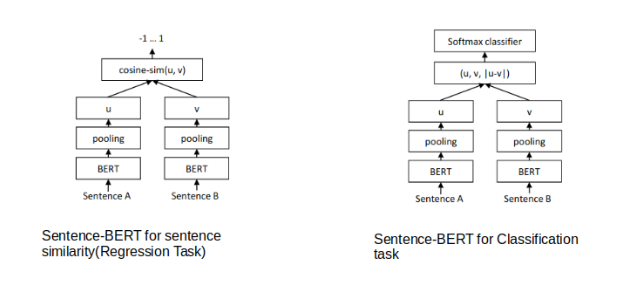

We can install Sentence BERT using:

In [ ]:
# !pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 5.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

Step 1:
We will then load the pre-trained BERT model. There are many other pre-trained models available.

In [ ]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Step 2:
We will then encode the provided sentences. We can also display the sentence vectors

In [ ]:
sentence_embeddings = sbert_model.encode(sentences)

print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))
print('Sample BERT embedding vector - note includes negative values', sentence_embeddings[0])

Sample BERT embedding vector - length 768
Sample BERT embedding vector - note includes negative values [ 2.07715511e-01 -5.08164149e-03  1.96157897e+00 -2.06673056e-01
 -2.54174583e-02  4.14883703e-01 -1.25817907e+00  8.29503894e-01
 -3.78569603e-01 -4.21866655e-01  2.80214638e-01  7.82959580e-01
  8.91004682e-01  5.30921333e-02  1.27828941e-01  1.06608167e-01
  4.87411886e-01 -2.70586133e-01  1.89428300e-01 -7.60948956e-01
 -5.01209125e-02  2.31528997e-01 -9.41673577e-01  1.30141214e-01
 -2.15184893e-02  4.30828989e-01 -2.72705257e-01  4.61000621e-01
  1.17238271e+00 -7.30051380e-03 -2.90633023e-01 -1.34497195e-01
  9.05883193e-01 -8.16391289e-01  2.21491426e-01 -8.89197230e-01
 -1.65462792e-01  2.54761338e-01 -4.34204876e-01  6.83824182e-01
 -5.26550829e-01  7.96460360e-02  6.72950625e-01  2.79282153e-01
 -6.30844980e-02  1.67101666e-01  1.04765713e+00  1.35828543e+00
  5.20906091e-01 -1.01330471e+00  1.02780926e+00 -1.05658269e+00
 -2.57637799e-01  6.63372636e-01 -6.01735175e-01  1.

Step 3: Then we will define a test query and encode it as well:

In [ ]:
query = "I had pizza and pasta"
query_vec = sbert_model.encode([query])[0]

Step 4:
We will then compute the cosine similarity using scipy. We will retrieve the similarity values between the sentences and our test query:

In [ ]:
for sent in sentences:
  sim = cosine(query_vec, sbert_model.encode([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  I ate dinner ; similarity =  0.70626134
Sentence =  We had a three-course meal ; similarity =  0.6379333
Sentence =  Brad came to dinner with us ; similarity =  0.5786195
Sentence =  He loves fish tacos ; similarity =  0.6081957
Sentence =  In the end, we all felt like we ate too much ; similarity =  0.40863013
Sentence =  We all agreed; it was a magnificent evening ; similarity =  0.17486157


There you go, we have obtained the similarity between the sentences in our text and our test sentence. A crucial point to note is that SentenceBERT is pretty slow if you want to train it from scratch.

Reference:
https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/

# Start Reading From Here - Jordana

**Split the sentence using PunktSentenceTokenizer for to develop the "document" list. Utilised BERT sentence tranformer for embedding**

In [ ]:
import pandas as pd

In [ ]:
article = pd.read_csv("/content/sample_data/17574_article.csv")
article

,id,author,date,year,month,topic,article
0,17574,Choe Sang-Hun,11/03/2017,2017,3,business,"SEOUL, South Korea ? A special prosecutor i..."


In [ ]:
# # Loading PunktSentenceTokenizer using English pickle file
tokenizer = nltk.data.load('tokenizers/punkt/PY3/english.pickle')

In [ ]:
# Function to tokenize a single article
def tokenize_article(text):
    return tokenizer.tokenize(text)

In [ ]:
article['split_sentence'] = article['article'].apply(lambda x: tokenize_article(x))
article

,id,author,date,year,month,topic,article,split_sentence
0,17574,Choe Sang-Hun,11/03/2017,2017,3,business,"SEOUL, South Korea ? A special prosecutor i...","[SEOUL, South Korea ?, A special prosecutor i..."


In [ ]:
# Apply the len function to calculate the size of each list in 'tokenized_article'
article['tokenized_article_size'] = article['split_sentence'].apply(lambda x: len(x))

# Now you have a new column 'tokenized_article_size' containing the size of each list of tokens
print(article['tokenized_article_size'])


0    31
Name: tokenized_article_size, dtype: int64


In [ ]:
for sentence in article['split_sentence']:
    print(sentence)

['SEOUL, South Korea  ?', 'A special prosecutor investigating the corruption scandal that led to President Park  ?s impeachment summoned the de facto head of Samsung for questioning on Wednesday, calling him a bribery suspect.', 'The de facto leader, Jay Y. Lee, the vice chairman of Samsung, will be questioned on Thursday, according to the special prosecutor?s office, which recommended that he also be investigated on suspicion of perjury.', 'Mr. Lee effectively runs Samsung, South Korea?s largest conglomerate he is the son of its chairman, Lee   who has been incapacitated with health problems.', 'He is expected to be asked whether   donations that Samsung made to two foundations controlled by Choi   a longtime friend of the president, amounted to bribes, and what role, if any, he played in the decision to give the money.', 'Investigators at the special prosecutor?s office have questioned other senior Samsung executives as suspects about the bribery accusations.', 'Neither Samsung nor M

In [ ]:
sentence_embeddings = sbert_model.encode(article['split_sentence'])

print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))

Sample BERT embedding vector - length 768


In [ ]:
query = "How many charges of coercing on Ms. Choi"
query_vec = sbert_model.encode([query])[0]

In [ ]:
for sent in article['split_sentence']:
  sim = cosine(query_vec, sbert_model.encode([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  ['SEOUL, South Korea  ?', 'A special prosecutor investigating the corruption scandal that led to President Park  ?s impeachment summoned the de facto head of Samsung for questioning on Wednesday, calling him a bribery suspect.', 'The de facto leader, Jay Y. Lee, the vice chairman of Samsung, will be questioned on Thursday, according to the special prosecutor?s office, which recommended that he also be investigated on suspicion of perjury.', 'Mr. Lee effectively runs Samsung, South Korea?s largest conglomerate he is the son of its chairman, Lee   who has been incapacitated with health problems.', 'He is expected to be asked whether   donations that Samsung made to two foundations controlled by Choi   a longtime friend of the president, amounted to bribes, and what role, if any, he played in the decision to give the money.', 'Investigators at the special prosecutor?s office have questioned other senior Samsung executives as suspects about the bribery accusations.', 'Neither S

In [ ]:
# List to store tuples of (sentence, similarity)
similarities = []

# Loop through each tokenized sentence in the 'split_sentence' column
for sent_list in article['split_sentence']:
    # Encode each tokenized sentence using SBERT model
    for tokenized_sent in sent_list:
        sent_embedding = sbert_model.encode([tokenized_sent])[0]

        # Calculate similarity between query vector and sentence embedding
        sim = cosine(query_vec, sent_embedding)

        # Append the tuple of (sentence, similarity) to the list
        similarities.append((tokenized_sent, sim))

# Sort the list based on similarities in descending order
similarities.sort(key=lambda x: x[1], reverse=True)

# Get the top 5 entries
top_5_sentences = similarities[:5]

# Print the top 5 sentences with their cosine similarities
for i, (sent, sim) in enumerate(top_5_sentences, start=1):
    print(f"Top {i} Sentence = {sent}; similarity = {sim}")



Top 1 Sentence = It asked the National Assembly to file a perjury complaint against Mr. Lee, which would authorize the special prosecutor to open an investigation of that charge.; similarity = 0.6040630340576172
Top 2 Sentence = Investigators at the special prosecutor?s office have questioned other senior Samsung executives as suspects about the bribery accusations.; similarity = 0.5766208171844482
Top 3 Sentence = Allegations that Ms. Park helped Ms. Choi extort millions in bribes from Samsung and other companies are at the heart of the corruption scandal that led to the National Assembly?s vote to impeach her last month.; similarity = 0.575027346611023
Top 4 Sentence = The reference on Wednesday to possible perjury charges against Mr. Lee stemmed from that testimony.; similarity = 0.537574052810669
Top 5 Sentence = Asked whether investigators would seek to arrest Mr. Lee on bribery charges, a spokesman for the special prosecutor?s office, Lee   said, ?All possibilities are open.; sim

**Using N-gram list for to develop the "document" list. Utilised BERT sentence tranformer for embedding**

In [ ]:
# !pip install sentence-transformers # comment once installed it

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
import pandas as pd
article = pd.read_csv("/content/sample_data/17574_article.csv")
article

,id,author,date,year,month,topic,article
0,17574,Choe Sang-Hun,11/03/2017,2017,3,business,"SEOUL, South Korea ? A special prosecutor i..."


In [ ]:
import numpy as np
import nltk
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
import nltk
nltk.download('punkt')  # Ensure punkt tokenizer is downloaded

# Function to tokenize article text by word
def tokenize_article(article_text):
    # Tokenize the article text by word
    tokens = nltk.word_tokenize(article_text.lower())  # Lowercasing for consistency

    return tokens

# Apply the tokenize_article function to each row in the 'article' column
article['word_tokenize'] = article['article'].apply(tokenize_article)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
article

,id,author,date,year,month,topic,article,word_tokenize
0,17574,Choe Sang-Hun,11/03/2017,2017,3,business,"SEOUL, South Korea ? A special prosecutor i...","[seoul, ,, south, korea, ?, a, special, prosec..."


In [ ]:
from nltk.util import ngrams

# Function to create n-grams from word tokens
def create_ngrams(word_tokens, n=10):
    # Generate n-grams
    ngram_list = list(ngrams(word_tokens, n))

    # Convert n-grams to string format
    ngram_strings = [' '.join(ngram) for ngram in ngram_list]

    return ngram_strings

# Apply the create_ngrams function to each row in the 'word_tokenize' column
article['10_grams'] = article['word_tokenize'].apply(create_ngrams)


In [ ]:
# Apply the len function to calculate the size of each list in 'tokenized_article'
article['tokenized_size_10_grams'] = article['10_grams'].apply(lambda x: len(x))

# Now you have a new column 'tokenized_article_size' containing the size of each list of tokens
print(article['tokenized_size_10_grams'])

0    786
Name: tokenized_size_10_grams, dtype: int64


In [ ]:
article

,id,author,date,year,month,topic,article,word_tokenize,10_grams,tokenized_size_10_grams
0,17574,Choe Sang-Hun,11/03/2017,2017,3,business,"SEOUL, South Korea ? A special prosecutor i...","[seoul, ,, south, korea, ?, a, special, prosec...","[seoul , south korea ? a special prosecutor in...",786


In [ ]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Define a function which returns the cosine similarity between 2 vectors
def cosine(query, document):
  return np.dot(query,document) / (np.linalg.norm(query) * np.linalg.norm(document))

In [ ]:
query = "How many charges of coercing on Ms. Choi"
query_vec = sbert_model.encode([query])[0]

In [ ]:
# List to store tuples of (sentence, similarity)
similarities = []

# Loop through each tokenized sentence in the 'split_sentence' column
for sent_list in article['10_grams']:
    # Encode each tokenized sentence using SBERT model
    for tokenized_sent in sent_list:
        sent_embedding = sbert_model.encode([tokenized_sent])[0]

        # Calculate similarity between query vector and sentence embedding
        sim = cosine(query_vec, sent_embedding)

        # Append the tuple of (sentence, similarity) to the list
        similarities.append((tokenized_sent, sim))

# Sort the list based on similarities in descending order
similarities.sort(key=lambda x: x[1], reverse=True)

# Get the top 5 entries
top_5_sentences = similarities[:5]

# Print the top 5 sentences with their cosine similarities
for i, (sent, sim) in enumerate(top_5_sentences, start=1):
    print(f"Top {i} Sentence = {sent}; similarity = {sim}")


Top 1 Sentence = , state prosecutors indicted ms. choi on charges of coercing; similarity = 0.7989645600318909
Top 2 Sentence = prosecutors indicted ms. choi on charges of coercing 53 big; similarity = 0.7590687870979309
Top 3 Sentence = been looking into possible bribery charges against not only ms.; similarity = 0.7197688221931458
Top 4 Sentence = charges against not only ms. park but the businesses ,; similarity = 0.7144906520843506
Top 5 Sentence = state prosecutors indicted ms. choi on charges of coercing 53; similarity = 0.7123777270317078


# Using Sentence Transformers without tokenizing by words instead by sentences.

  Install Sentence Transformer library

In [4]:
!pip install -U sentence-transformers # comment once installed it

Import dependencies

In [5]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util # used for text encoding and sentence embedding
import torch # used for identifying index with highest similarity score
import spacy # used for processing and analyzing text data, and retrieving most relevant text passages
import numpy as np

Prepare source data

In [6]:
article_example = pd.read_csv("/content/sample_data/17574_article.csv")
article_example

,id,author,date,year,month,topic,article
0,17574,Choe Sang-Hun,11/03/2017,2017,3,business,"SEOUL, South Korea ? A special prosecutor i..."


# Load Sentence Transformer Models

We already imported specific modules and classes from the sentence-transformers library, using:

Now, we load specific SentenceTransformer models. Here, we load four different pre-trained models:

*   'paraphrase-MiniLM-L6-v2'
*   'multi-qa-MiniLM-L6-cos-v1'
*   'all-MiniLM-L6-v2'
*   'sentence-transformers/paraphrase-distilroberta-base-v1'

In [7]:
# Load pre-trained models
# model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
#model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')
model = SentenceTransformer('all-MiniLM-L6-v2')
# model = SentenceTransformer('sentence-transformers/paraphrase-distilroberta-base-v1')
# model = SentenceTransformer('bert-base-nli-mean-tokens')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# Sentence Tokenization using sent_tokenize from NLTK
The code snippet uses sent_tokenize function from NLTK library. The sent_tokenize function is used to segment a given text into a list of sentences.


#### Reference:
https://www.geeksforgeeks.org/nlp-how-tokenizing-text-sentence-words-works/

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
from nltk.tokenize import sent_tokenize

# Function to tokenize a single article
def tokenize_sentence(text):
    return sent_tokenize(text)

article_example['split_sentence'] = article_example['article'].apply(lambda x: tokenize_sentence(x))
article_example

,id,author,date,year,month,topic,article,split_sentence
0,17574,Choe Sang-Hun,11/03/2017,2017,3,business,"SEOUL, South Korea ? A special prosecutor i...","[SEOUL, South Korea ?, A special prosecutor i..."


In [18]:
# Apply the len function to calculate the size of each list in 'split_sentence'
print(article_example['split_sentence'].apply(lambda x: len(x)))


0    31
Name: split_sentence, dtype: int64


In [11]:
# sentence_embeddings = model.encode(article_example['split_sentence'])

In [16]:
query = "How many charges of coercing on Ms. Choi"
query_vec = model.encode([query])[0]

In [12]:
# def calculate_similarity_scores(query_vec, sent_embedding):
#     question_embedding = model.encode(query_vec)
#     similarity_scores = util.pytorch_cos_sim(question_embedding, sent_embedding)
#     return similarity_scores

def cosine(query, document):
  return np.dot(query,document) / (np.linalg.norm(query) * np.linalg.norm(document))

In [51]:
# List to store tuples of (sentence, similarity)
similarities = []

# Loop through each tokenized sentence in the 'split_sentence' column
for sent_list in article_example['split_sentence']:
    # Encode each tokenized sentence using all mini LM model
    for tokenized_sent in sent_list:
        sent_embedding = model.encode([tokenized_sent])[0]

        # Calculate similarity between query vector and sentence embedding
        sim = cosine(query_vec, sent_embedding)

        # Append the tuple of (sentence, similarity) to the list
        similarities.append((tokenized_sent, sim))

# Sort the list based on similarities in descending order
similarities.sort(key=lambda x: x[1], reverse=True)

# Get the top 5 entries
top_5_sentences = similarities[:5]

# Print the top 5 sentences with their cosine similarities
for i, (sent, sim) in enumerate(top_5_sentences, start=1):
    print(f"Top {i} Sentence = {sent}; similarity = {sim}")



Top 1 Sentence = The de facto leader, Jay Y. Lee, the vice chairman of Samsung, will be questioned on Thursday, according to the special prosecutor?s office, which recommended that he also be investigated on suspicion of perjury.; similarity = 0.6192812323570251
Top 2 Sentence = Mr. Lee effectively runs Samsung, South Korea?s largest conglomerate he is the son of its chairman, Lee   who has been incapacitated with health problems.; similarity = 0.6164064407348633
Top 3 Sentence = The national pension fund?s support was crucial for the merger, which analysts said helped Mr. Lee inherit control of Samsung from his father.; similarity = 0.5456995368003845
Top 4 Sentence = The special prosecutor has been investigating whether Samsung gave its support to Ms. Choi in exchange for a decision by the   National Pension Service to support a contentious merger of two Samsung affiliates in 2015.; similarity = 0.5329245328903198
Top 5 Sentence = Investigators at the special prosecutor?s office have

# Sentence Tokenization Using spaCy

spaCy is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython

# Reference:
https://www.kaggle.com/code/satishgunjal/tokenization-in-nlp#Tokenization-Techniques-


In [36]:
# !pip install spacy
# !python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 31.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [39]:
# Load English model from spacy
from spacy.lang.en import English

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

# Create the pipeline 'sentencizer' component
# sbd = nlp.create_pipe('sentencizer')

# Add component to the pipeline
nlp.add_pipe('sentencizer')

# Function to tokenize sentences using spaCy
def tokenize_sentence_spacy(text):
    doc = nlp(text)
    return [sent.text for sent in doc.sents]

# Apply the tokenize_sentence_spacy function to create a new column
article_example['split_sentence_spacy'] = article_example['article'].apply(tokenize_sentence_spacy)
article_example


,id,author,date,year,month,topic,article,split_sentence,split_sentence_spacy
0,17574,Choe Sang-Hun,11/03/2017,2017,3,business,"SEOUL, South Korea ? A special prosecutor i...","[SEOUL, South Korea ?, A special prosecutor i...","[SEOUL, South Korea ?, A special prosecutor..."


In [40]:
# Apply the len function to calculate the size of each list in 'split_sentence'
print(article_example['split_sentence_spacy'].apply(lambda x: len(x)))


0    32
Name: split_sentence_spacy, dtype: int64


In [52]:
# List to store tuples of (sentence, similarity)
similarities = []

# Loop through each tokenized sentence in the 'split_sentence' column
for sent_list in article_example['split_sentence_spacy']:
    # Encode each tokenized sentence using all mini LM model
    for tokenized_sent in sent_list:
        sent_embedding = model.encode([tokenized_sent])[0]

        # Calculate similarity between query vector and sentence embedding
        sim = cosine(query_vec, sent_embedding)

        # Append the tuple of (sentence, similarity) to the list
        similarities.append((tokenized_sent, sim))

# Sort the list based on similarities in descending order
similarities.sort(key=lambda x: x[1], reverse=True)

# Get the top 5 entries
top_5_sentences = similarities[:5]

# Print the top 5 sentences with their cosine similarities
for i, (sent, sim) in enumerate(top_5_sentences, start=1):
    print(f"Top {i} Sentence = {sent}; similarity = {sim}")



Top 1 Sentence = The de facto leader, Jay Y. Lee, the vice chairman of Samsung, will be questioned on Thursday, according to the special prosecutor?s office, which recommended that he also be investigated on suspicion of perjury.; similarity = 0.6192812323570251
Top 2 Sentence = Mr. Lee effectively runs Samsung, South Korea?s largest conglomerate he is the son of its chairman, Lee   who has been incapacitated with health problems.; similarity = 0.6164064407348633
Top 3 Sentence = The national pension fund?s support was crucial for the merger, which analysts said helped Mr. Lee inherit control of Samsung from his father.; similarity = 0.5456995368003845
Top 4 Sentence = The special prosecutor has been investigating whether Samsung gave its support to Ms. Choi in exchange for a decision by the   National Pension Service to support a contentious merger of two Samsung affiliates in 2015.; similarity = 0.5329245328903198
Top 5 Sentence = Investigators at the special prosecutor?s office have

# Sentence Tokenization using re

# Reference:
https://www.analyticsvidhya.com/blog/2019/07/how-get-started-nlp-6-unique-ways-perform-tokenization/



In [17]:
import re

# Function to tokenize sentences using spaCy
def tokenize_sentence_re(text):
  return re.compile('[.!?] ').split(text)

# Apply the tokenize_sentence_spacy function to create a new column
article_example['split_sentence_re'] = article_example['article'].apply(tokenize_sentence_re)
article_example

,id,author,date,year,month,topic,article,split_sentence_re
0,17574,Choe Sang-Hun,11/03/2017,2017,3,business,"SEOUL, South Korea ? A special prosecutor i...","[SEOUL, South Korea , A special prosecutor ..."


In [10]:
# Apply the len function to calculate the size of each list in 'split_sentence'
print(article_example['split_sentence_re'].apply(lambda x: len(x)))

0    53
Name: split_sentence_re, dtype: int64


In [18]:
# List to store tuples of (sentence, similarity)
similarities = []

# Loop through each tokenized sentence in the 'split_sentence' column
for sent_list in article_example['split_sentence_re']:
    # Encode each tokenized sentence using all mini LM model
    for tokenized_sent in sent_list:
        sent_embedding = model.encode([tokenized_sent])[0]

        # Calculate similarity between query vector and sentence embedding
        sim = cosine(query_vec, sent_embedding)

        # Append the tuple of (sentence, similarity) to the list
        similarities.append((tokenized_sent, sim))

# Sort the list based on similarities in descending order
similarities.sort(key=lambda x: x[1], reverse=True)

# Get the top 5 entries
top_5_sentences = similarities[:5]

# Print the top 5 sentences with their cosine similarities
for i, (sent, sim) in enumerate(top_5_sentences, start=1):
    print(f"Top {i} Sentence = {sent}; similarity = {sim}")



Top 1 Sentence = Choi extort millions in bribes from Samsung and other companies are at the heart of the corruption scandal that led to the National Assembly?s vote to impeach her last month; similarity = 0.6145171523094177
Top 2 Sentence = Choi on charges of coercing 53 big businesses, including Samsung, to contribute $69 million to her two foundations; similarity = 0.6045876145362854
Top 3 Sentence = Choi?s daughter; similarity = 0.5373181104660034
Top 4 Sentence = Lee, which would authorize the special prosecutor to open an investigation of that charge; similarity = 0.4755879342556
Top 5 Sentence = Choi that contained emails she exchanged with a Samsung executive; similarity = 0.47054141759872437


# Tokenization using Gensim

It is an open-source library for unsupervised topic modeling and natural language processing and is designed to automatically extract semantic topics from a given document.

# Reference:
https://www.analyticsvidhya.com/blog/2019/07/how-get-started-nlp-6-unique-ways-perform-tokenization/

In [28]:
!pip install gensim==3.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 36.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-3.8.0-cp310-cp310-linux_x86_64.whl size=24680954 sha256=566fcc7864e59174c5cf088ec0321105345570a6b5ccdd85d763672bb2d18d4c
  Stored in directory: /root/.cache/pip/wheels/01/ab/bf/07d4e3462e9f8d17d98c2fb5e870d7e9934c8482a32fc3ef41
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.2
    Uninstalling gensim-4.3.2:
      Successfully uninstalled gensim-4.3.2


In [29]:
import gensim
print(gensim.__version__)

4.3.2


In [30]:
from gensim.summarization.textcleaner import split_sentences

# Function to tokenize sentences using spaCy
def tokenize_sentence_gensim(text):
  return split_sentences(text)

# Apply the tokenize_sentence_spacy function to create a new column
article_example['split_sentence_gensim'] = article_example['article'].apply(tokenize_sentence_gensim)
article_example

,id,author,date,year,month,topic,article,split_sentence_re,split_sentence_gensim
0,17574,Choe Sang-Hun,11/03/2017,2017,3,business,"SEOUL, South Korea ? A special prosecutor i...","[SEOUL, South Korea , A special prosecutor ...","[SEOUL, South Korea ?, A special prosecutor i..."
